# Decision Tree Classifier
Impariamo a fare un algoritmo di Machine Learning per prevedere se una persona pagherà o no le sue bollette.

<img src="https://raw.githubusercontent.com/enzoschitini/repository-data-science-library/main/Data%20Science/EBAC%20Decision%20Tree%20Classifier/Decision%20Tree%20Classifier%20white.png" alt="capa">

---

# **Scituffy** | EBAC: Decision Tree Classifier
I dati ci offrono informazioni sugli utenti di questa banca, il nostro obiettivo è quello di capire cosa porta una persona a non pagare le bollette, e lo faremo tramite un algoritmo di Machine Learning che tramite le caratteristiche delle persone ce lo dirà.

**Data Science** Portfóli | *27 Abril 2024*

[Enzo Schitini](https://www.linkedin.com/in/enzoschitini/) - Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator

---

In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [205]:
df = pd.read_csv('./Crédito.csv').drop(columns='Unnamed: 0')
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
3,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28
4,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,4010.69,1088.07,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,710841183,0,54,M,1,ensino medio,solteiro,$60K - $80K,blue,34,5,0,2,13940.62,15577.67,114
7077,713899383,0,56,F,1,mestrado,solteiro,menos que $40K,blue,50,4,4,1,3688.95,14596.49,120
7078,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,4003.91,15476.26,117
7079,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,5409.16,10291.78,60


## Preparazione dei dati

In [206]:
df = pd.get_dummies(df)
df

,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,...,estado_civil_solteiro,salario_anual_$120K +,salario_anual_$40K - $60K,salario_anual_$60K - $80K,salario_anual_$80K - $120K,salario_anual_menos que $40K,tipo_cartao_blue,tipo_cartao_gold,tipo_cartao_platinum,tipo_cartao_silver
0,768805383,0,45,3,39,5,3,1,12691.51,1144.90,...,False,False,False,True,False,False,True,False,False,False
1,818770008,0,49,5,44,6,2,1,8256.96,1291.45,...,True,False,False,False,False,True,True,False,False,False
2,713982108,0,51,3,36,4,0,1,3418.56,1887.72,...,False,False,False,False,True,False,True,False,False,False
3,709106358,0,40,3,21,5,0,1,4716.22,816.08,...,False,False,False,True,False,False,True,False,False,False
4,713061558,0,44,2,36,3,2,1,4010.69,1088.07,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,710841183,0,54,1,34,5,0,2,13940.62,15577.67,...,True,False,False,True,False,False,True,False,False,False
7077,713899383,0,56,1,50,4,4,1,3688.95,14596.49,...,True,False,False,False,False,True,True,False,False,False
7078,772366833,0,50,2,40,3,3,2,4003.91,15476.26,...,True,False,True,False,False,False,True,False,False,False
7079,716506083,1,44,1,36,5,4,3,5409.16,10291.78,...,False,False,False,False,False,True,True,False,False,False


In [207]:
y = df['default']
X = df.drop('default', axis=1)

In [208]:
clf_df = DecisionTreeClassifier(random_state=100)

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [210]:
clf_df.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

### Che cos'è `class_names`?

In [211]:
"""plt.figure(figsize=(25, 10))
plot_tree(clf_df,
          filled=True,
          feature_names=X_train.columns);"""

'plt.figure(figsize=(25, 10))\nplot_tree(clf_df,\n          filled=True,\n          feature_names=X_train.columns);'

In [212]:
# Make predictions on the test set
predictions = clf_df.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", (accuracy * 100).round(), "%")

Accuracy: 91.0 %


In [213]:
confusion_matrix(y_test,predictions)

array([[1680,  109],
       [  84,  252]], dtype=int64)

In [214]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions)

0.75

### Bilanciare i dati

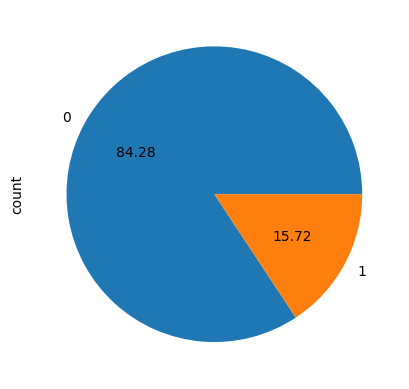

In [215]:
y.value_counts().plot.pie(autopct='%.2f');

In [216]:
y.value_counts()

default
0    5968
1    1113
Name: count, dtype: int64

In [217]:
(y.value_counts()/y.shape[0])*100

default
0    84.281881
1    15.718119
Name: count, dtype: float64

In [218]:
from imblearn.under_sampling import RandomUnderSampler

In [219]:
rus = RandomUnderSampler(random_state=42)

In [220]:
X_train, y_train = rus.fit_resample(X_train, y_train)

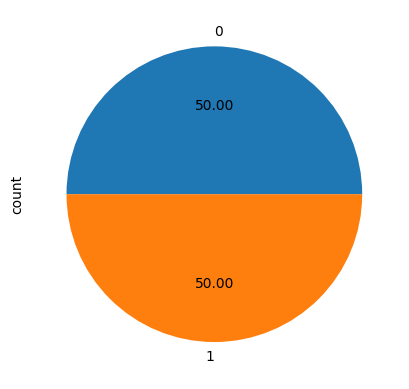

In [221]:
y_train.value_counts().plot.pie(autopct='%.2f');

In [222]:
clf_df2 = DecisionTreeClassifier(random_state=100)

In [223]:
clf_df2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [224]:
"""plt.figure(figsize=(25, 10))
plot_tree(clf_df2,
          filled=True,
          feature_names=X_train.columns);"""

'plt.figure(figsize=(25, 10))\nplot_tree(clf_df2,\n          filled=True,\n          feature_names=X_train.columns);'

In [225]:
# Make predictions on the test set
predictions = clf_df2.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", (accuracy * 100).round(), "%")

Accuracy: 88.0 %


In [226]:
confusion_matrix(y_test,predictions)

array([[1574,  215],
       [  39,  297]], dtype=int64)

In [227]:
recall_score(y_test,predictions)

0.8839285714285714

In [228]:
print(X_train.shape)
print(y_train.shape)

(1554, 29)
(1554,)


---

In [229]:
def prestazioni(albero, teste_x, teste_y):
    from sklearn.metrics import precision_score
    predictions = albero.predict(teste_x)
    accuracy = accuracy_score(teste_y, predictions)
    precision_score_value = precision_score(teste_y, predictions)
    recall_score_value = recall_score(teste_y,predictions)
    
    print("Accuracy:", (accuracy * 100).round(), "%")
    print('\nConfusion Matrix:')
    print(confusion_matrix(teste_y,predictions))
    print("\nRecall Score:", (recall_score_value * 100).round(), "%")
    print('\nPrecision Score Value', (precision_score_value * 100).round(), "%")

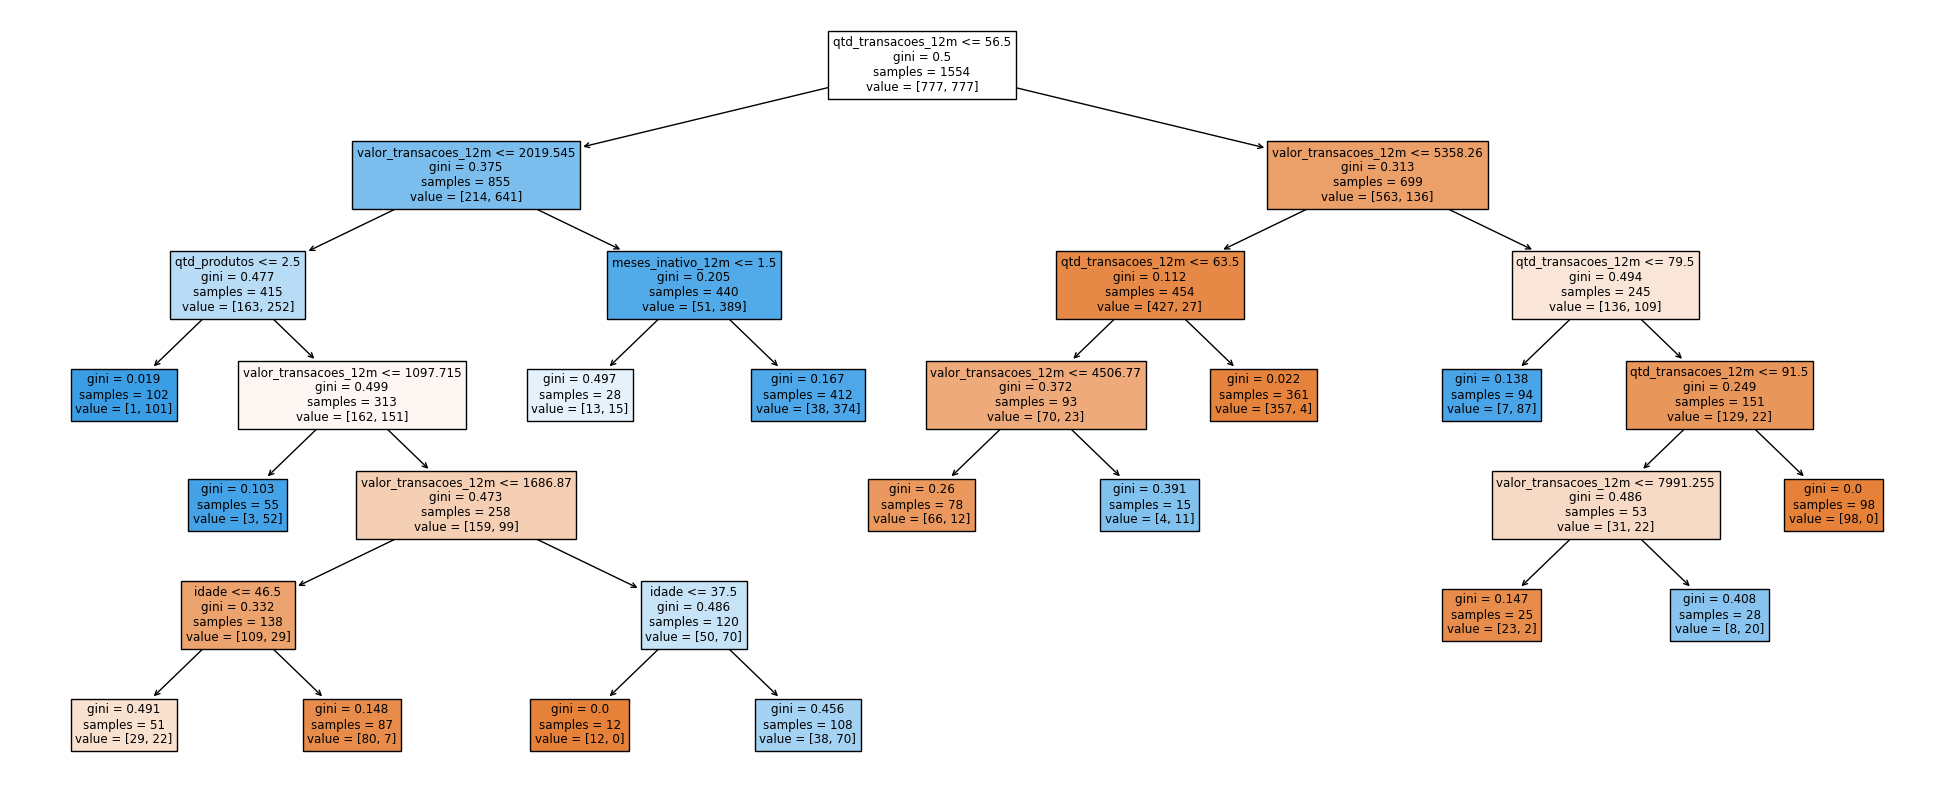

In [230]:
clf_df3 = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=15, max_features=25, random_state=100)
clf_df3.fit(X_train, y_train)

plt.figure(figsize=(25, 10))
plot_tree(clf_df3,
          filled=True,
          feature_names=X_train.columns);

In [231]:
predictions = clf_df3.predict(X_test)

In [232]:
# Calcola il numero totale di 0 e 1 all'interno dell'array
count_0 = np.count_nonzero(predictions == 0)
count_1 = np.count_nonzero(predictions == 1)

# Calcola la proporzione di 0 e 1 rispetto alla lunghezza totale dell'array
proportion_0 = count_0 / len(predictions)
proportion_1 = count_1 / len(predictions)

# Stampa i risultati
print("Proporzione di 0:", proportion_0)
print("Proporzione di 1:", proportion_1)

Proporzione di 0: 0.7214117647058823
Proporzione di 1: 0.27858823529411764


In [233]:
prestazioni(clf_df3, X_test, y_test)

Accuracy: 85.0 %

Confusion Matrix:
[[1503  286]
 [  30  306]]

Recall Score: 91.0 %

Precision Score Value 52.0 %


### Applicando il nostro modello

In [234]:
"""
df_new = X_train

predictions = clf_df3.predict(df_new)
df_new['predicted_default'] = predictions
df_new.predicted_default.value_counts()
"""

"\ndf_new = X_train\n\npredictions = clf_df3.predict(df_new)\ndf_new['predicted_default'] = predictions\ndf_new.predicted_default.value_counts()\n"

### Post pruning

In [235]:
clf = DecisionTreeClassifier(random_state=100)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [236]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [237]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_score = [clf.score(X_test, y_test) for clf in clfs]

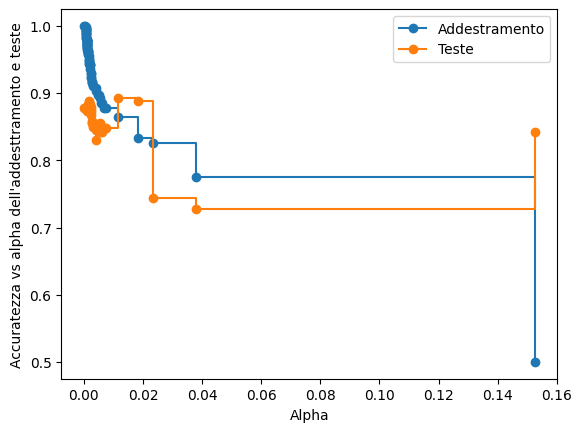

In [238]:
fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel("Accuratezza vs alpha dell'addesttramento e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label='Addestramento',
        drawstyle='steps-post')
ax.plot(ccp_alphas, test_score, marker='o', label='Teste',
        drawstyle='steps-post')
ax.legend()
plt.show()

In [239]:
ALPHA = pd.DataFrame({'Alphas':ccp_alphas.tolist(), 'Score': test_score})

In [240]:
ALPHA[ALPHA['Score'] == 0.892235294117647]

,Alphas,Score
70,0.011505,0.892235


### L'albero migliore

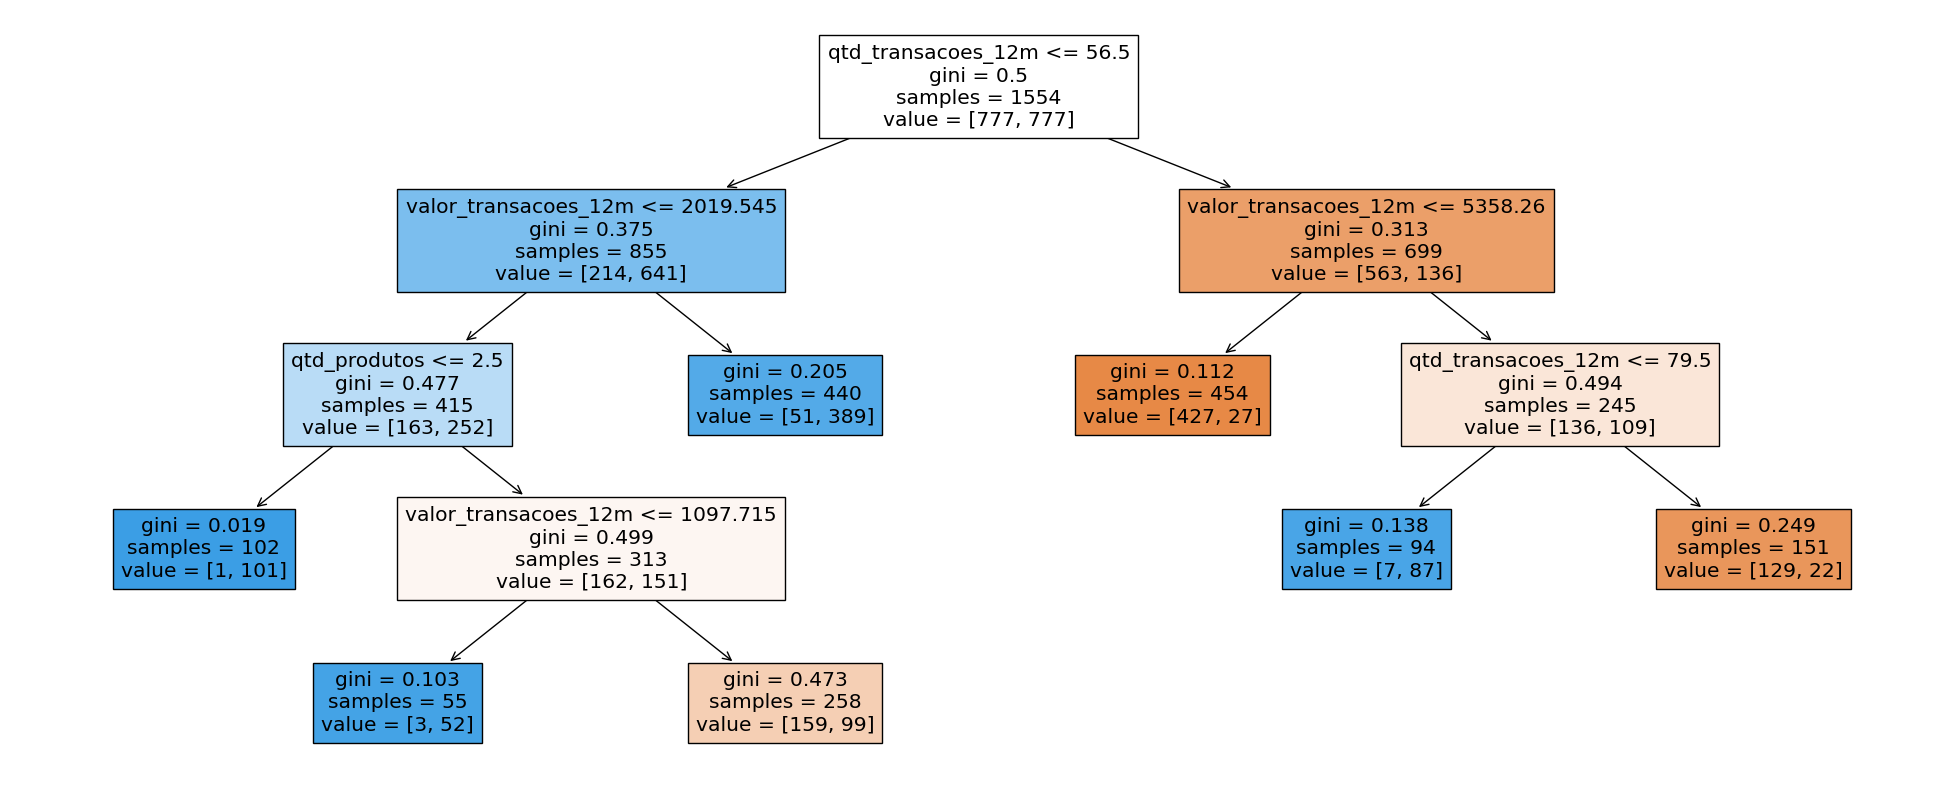

In [241]:
clf_df4 = DecisionTreeClassifier(ccp_alpha=0.011505, random_state=100)
clf_df4.fit(X_train, y_train)

plt.figure(figsize=(25, 10))
plot_tree(clf_df4,
          filled=True,
          feature_names=X_train.columns);

In [242]:
predictions = clf_df4.predict(X_test)

In [243]:
# Calcola il numero totale di 0 e 1 all'interno dell'array
count_0 = np.count_nonzero(predictions == 0)
count_1 = np.count_nonzero(predictions == 1)

# Calcola la proporzione di 0 e 1 rispetto alla lunghezza totale dell'array
proportion_0 = count_0 / len(predictions)
proportion_1 = count_1 / len(predictions)

# Stampa i risultati
print("Proporzione di 0:", proportion_0)
print("Proporzione di 1:", proportion_1)

Proporzione di 0: 0.7887058823529411
Proporzione di 1: 0.21129411764705883


In [244]:
prestazioni(clf_df4, X_test, y_test)

Accuracy: 89.0 %

Confusion Matrix:
[[1618  171]
 [  58  278]]

Recall Score: 83.0 %

Precision Score Value 62.0 %


In [245]:
clf_df4.get_params()

{'ccp_alpha': 0.011505,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 100,
 'splitter': 'best'}

In [246]:
pd.DataFrame(clf_df4.predict_proba(X_test)).head(5)

,0,1
0,0.940529,0.059471
1,0.616279,0.383721
2,0.854305,0.145695
3,0.940529,0.059471
4,0.616279,0.383721


In [247]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.6191536748329621

In [250]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1789
           1       0.62      0.83      0.71       336

    accuracy                           0.89      2125
   macro avg       0.79      0.87      0.82      2125
weighted avg       0.91      0.89      0.90      2125



In [254]:
feature_names = X.columns

feature_importance = pd.DataFrame(clf_df4.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance.head(5)

,0
qtd_transacoes_12m,0.674648
valor_transacoes_12m,0.238322
qtd_produtos,0.087031
id,0.000000
escolaridade_sem educacao formal,0.000000


<Axes: >

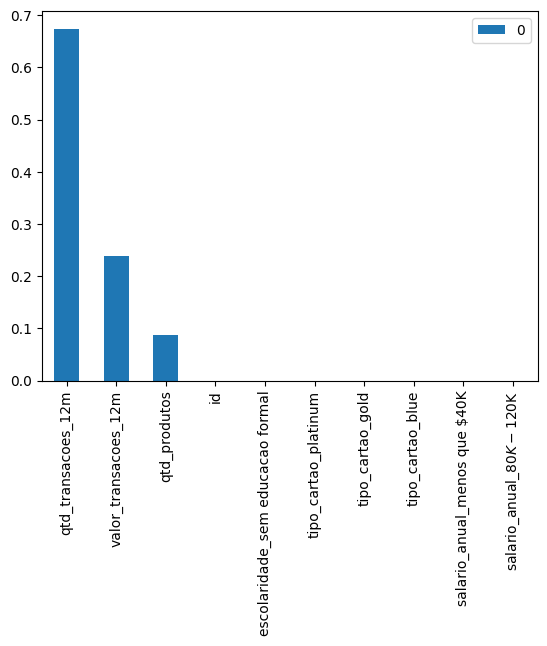

In [255]:
features = list(feature_importance[feature_importance[0]>0].index)
feature_importance.head(10).plot(kind='bar')

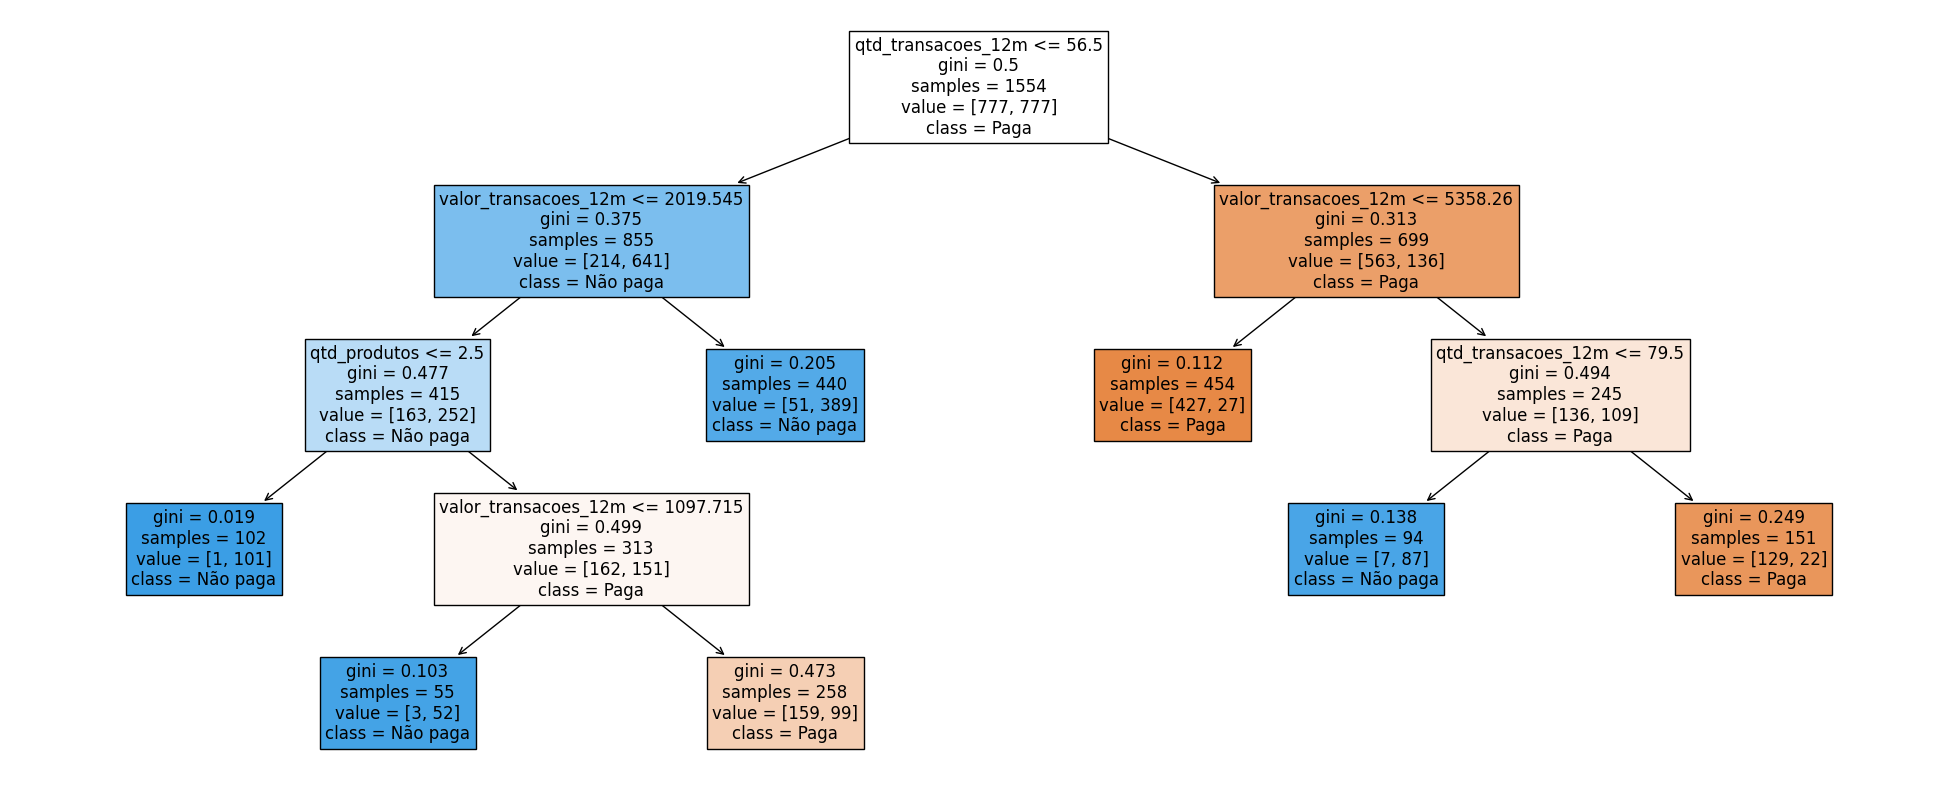

In [260]:
from sklearn import tree

fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(clf_df4, 
                   feature_names=feature_names,  
                   class_names={0:'Paga', 1:'Não paga'},
                   filled=True,
                  fontsize=12)

In [261]:
clf_df4.decision_path(X_test)

<2125x13 sparse matrix of type '<class 'numpy.int64'>'
	with 7602 stored elements in Compressed Sparse Row format>

In [262]:
sparse = clf_df4.decision_path(X_test).toarray()[:101]

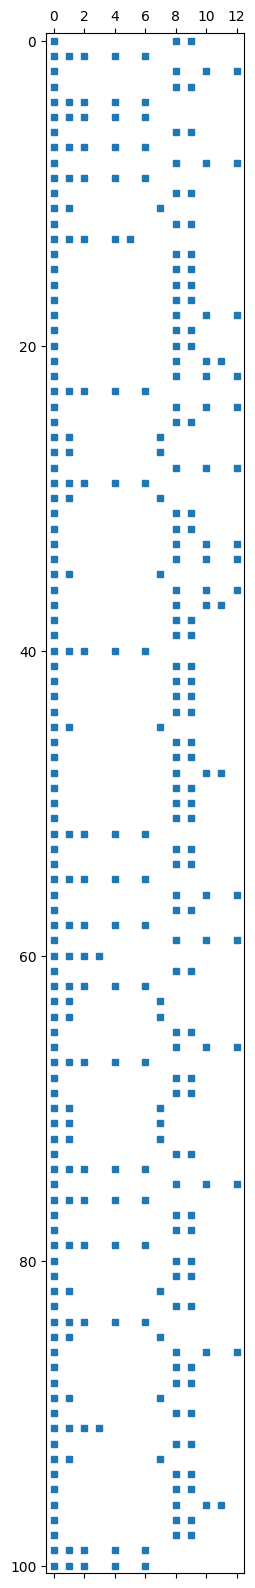

In [263]:
plt.figure(figsize=(20, 20))
plt.spy(sparse, markersize=5)